## Data Ingestion

Features:
* id - its an identifier, so we can drop this feature.
* carat - its representing measurement unit which is physical weight of diamond.
* cut - it refers to the diamond cut grade. Excellent (the best grade), Very Good, Good, Fair, Poor (the worst grade).
* color - it refers to how clear a diamond is. The diamond color scale ranges from D (entirely clear) to Z (a yellowish tint)
    - Colorless — D, E, F.
    - Near Colorless — G, H, I, J.
    - Taint Yellow — K, L, M.
    - Very Light Yellow — N, O, P, Q, R.
    - Light Yellow — S, T, U, V, W, X, Y, Z.
* clarity - it refers to the qualitative metric that grades the visual appearance of each diamond.
    - Flawless (FL) No inclusions and no blemishes visible under 10x magnification
    - Internally Flawless (IF) No inclusions visible under 10x magnification
    - Very, Very Slightly Included (VVS1 and VVS2) Inclusions so slight they are difficult for a skilled grader to see under 10x magnification
    - Very Slightly Included (VS1 and VS2) Inclusions are observed with effort under 10x magnification, but can be characterized as minor
    - Slightly Included (SI1 and SI2) Inclusions are noticeable under 10x magnification
    - Included (I1, I2, and I3) Inclusions are obvious under 10x magnification which may affect transparency and brilliance

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"..\\notebooks\\data\\gemstone.csv")

In [4]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
### Shape of dataset
df.shape

(193573, 11)

Infernce:
* Rows - 1,93,573
* Columns - 10

In [6]:
### Missing values

df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [8]:
### Dropping unwanted feature
df.drop(columns=['id'], axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [9]:
### Check for Duplicate values

df.duplicated().sum()

0

Inference: There are no missing values

In [10]:
### Segregating Numerical & Catergorical features

cat_features = df.columns[df.dtypes == 'object']
num_features = df.columns[df.dtypes != 'object']

In [11]:
df[cat_features]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [12]:
df[num_features]

,carat,depth,table,x,y,z,price
0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,62.9,55.0,4.45,4.49,2.81,681


In [13]:
df[cat_features].describe()


,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [14]:
df[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [15]:
### FInd out the categories of categorical feature
df[cat_features]['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

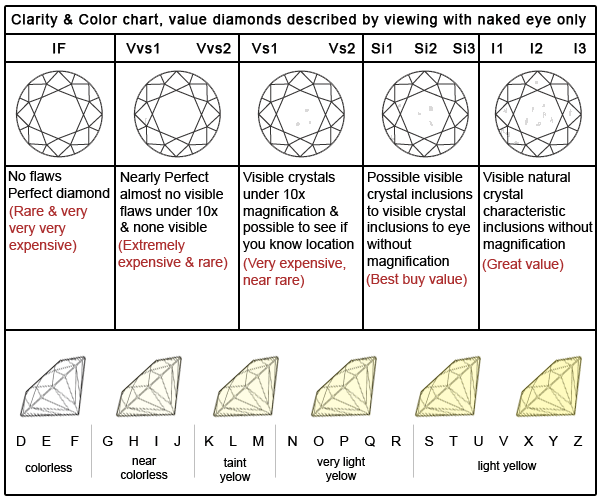

In [18]:
df[cat_features]['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [19]:
df[cat_features]['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

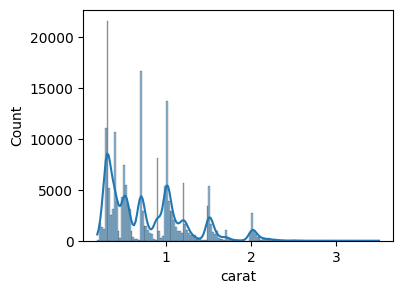

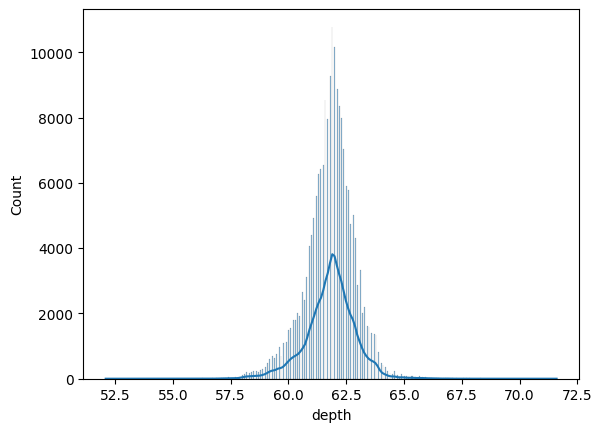

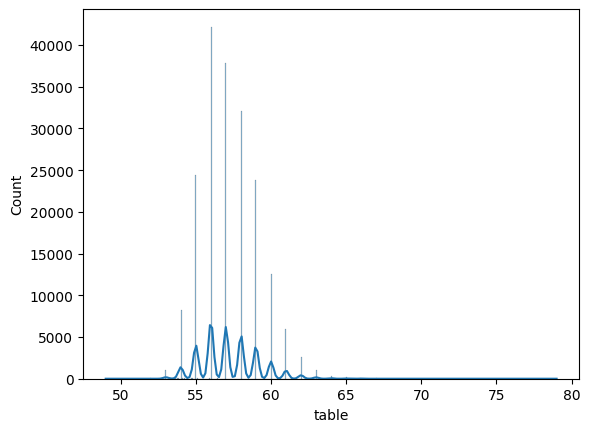

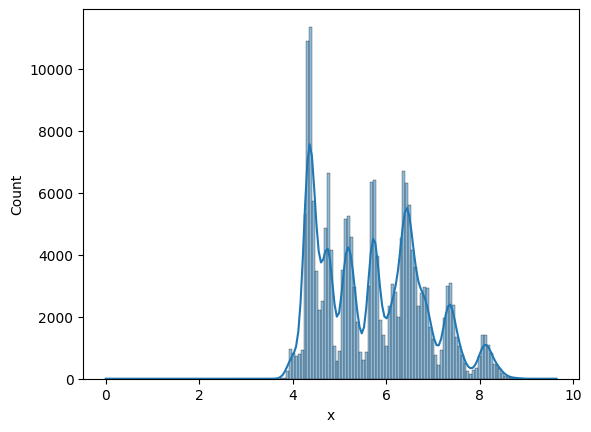

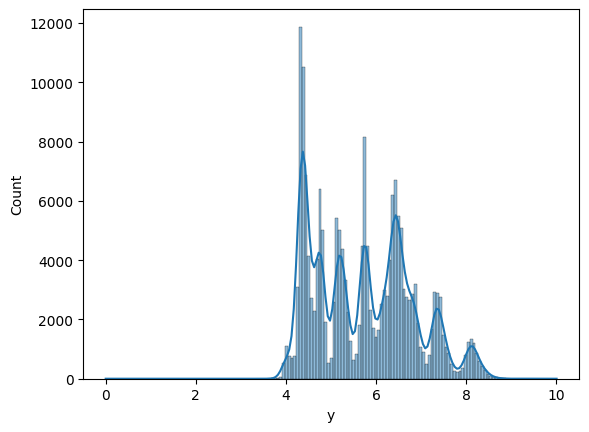

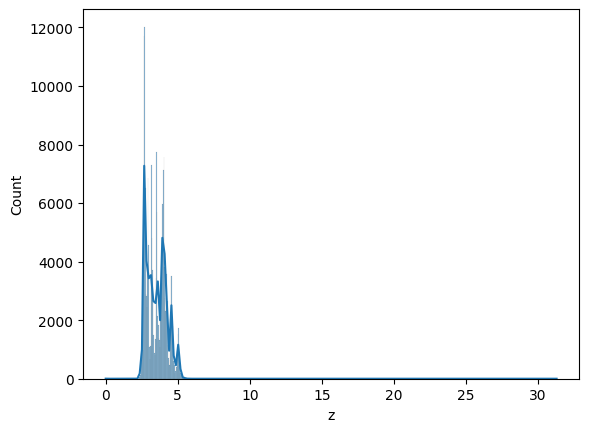

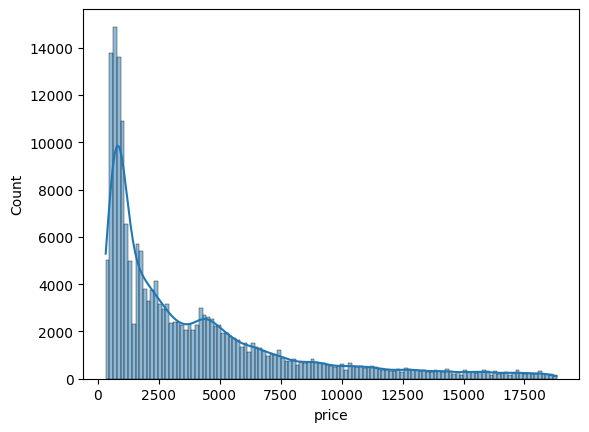

In [20]:
### Numerical features
plt.figure(figsize=(4,3))

for col in num_features:
    sns.histplot(data=df, x=col, kde=True)
    print("\n")
    plt.show()

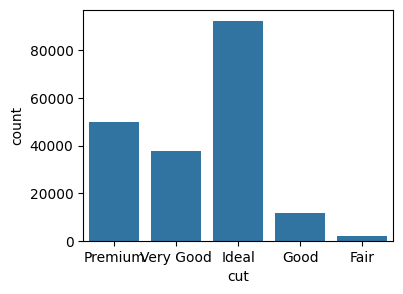

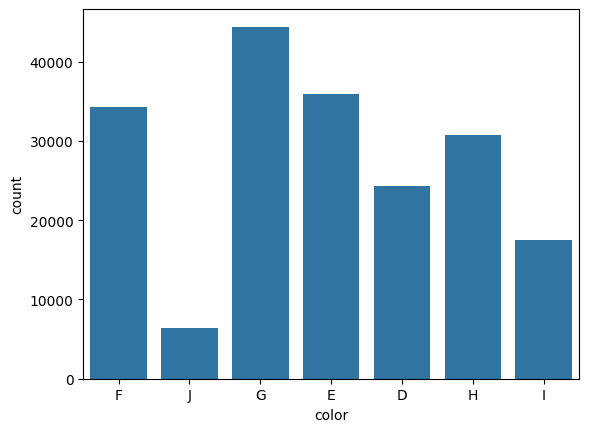

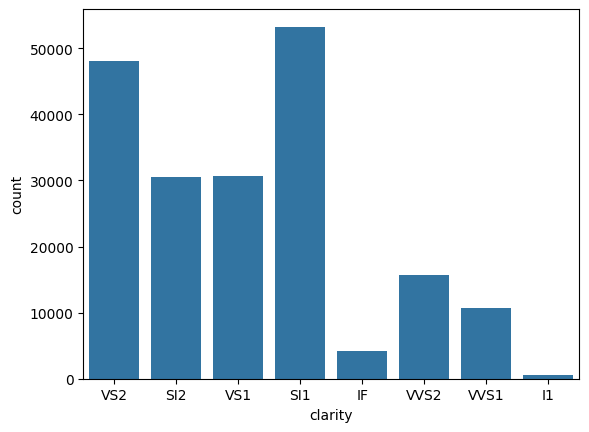

In [21]:
### Categorical features
plt.figure(figsize=(4,3))

for col in cat_features:
    sns.countplot(data=df, x=col)
    print("\n")
    plt.show()

<Axes: >

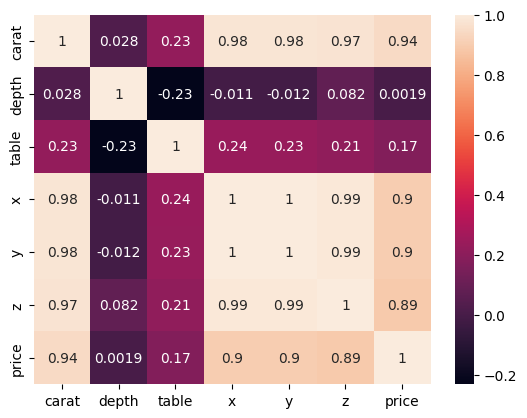

In [22]:
### Correlation

sns.heatmap(data=df[num_features].corr(), annot=True)

## Feature Engineering

In [23]:
# encoding

for col in cat_features:
    print("Feature: {}, has unique values: {}".format(col, df[col].unique()))

Feature: cut, has unique values: ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
Feature: color, has unique values: ['F' 'J' 'G' 'E' 'D' 'H' 'I']
Feature: clarity, has unique values: ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


In [24]:
# Ordinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [25]:
df['cut'] = df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [26]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
